In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "fashion_mnist_fig", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=600)

In [2]:
def plot_images(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [3]:
import pandas as pd
zalando_data_train = pd.read_csv('fashion-mnist_train.csv')
zalando_data_test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
y_train = zalando_data_train['label'].values
print(y_train.shape)
y_train

(60000,)


array([2, 9, 6, ..., 8, 8, 7])

In [5]:
print(len(y_train == 0))

60000


In [6]:
X_train = zalando_data_train.drop('label', axis=1).values
print(X_train.shape)

(60000, 784)


In [7]:
y_test = zalando_data_test['label'].values
print(y_test.shape)

(10000,)


In [8]:
X_test = zalando_data_test.drop('label', axis=1).values
print(X_test.shape)

(10000, 784)


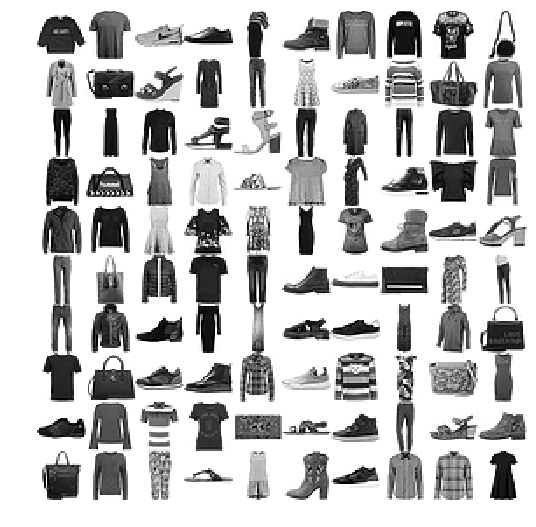

In [9]:
# show some images
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_images(example_images, images_per_row=10)
# save_fig("more_images_plot")
plt.show()

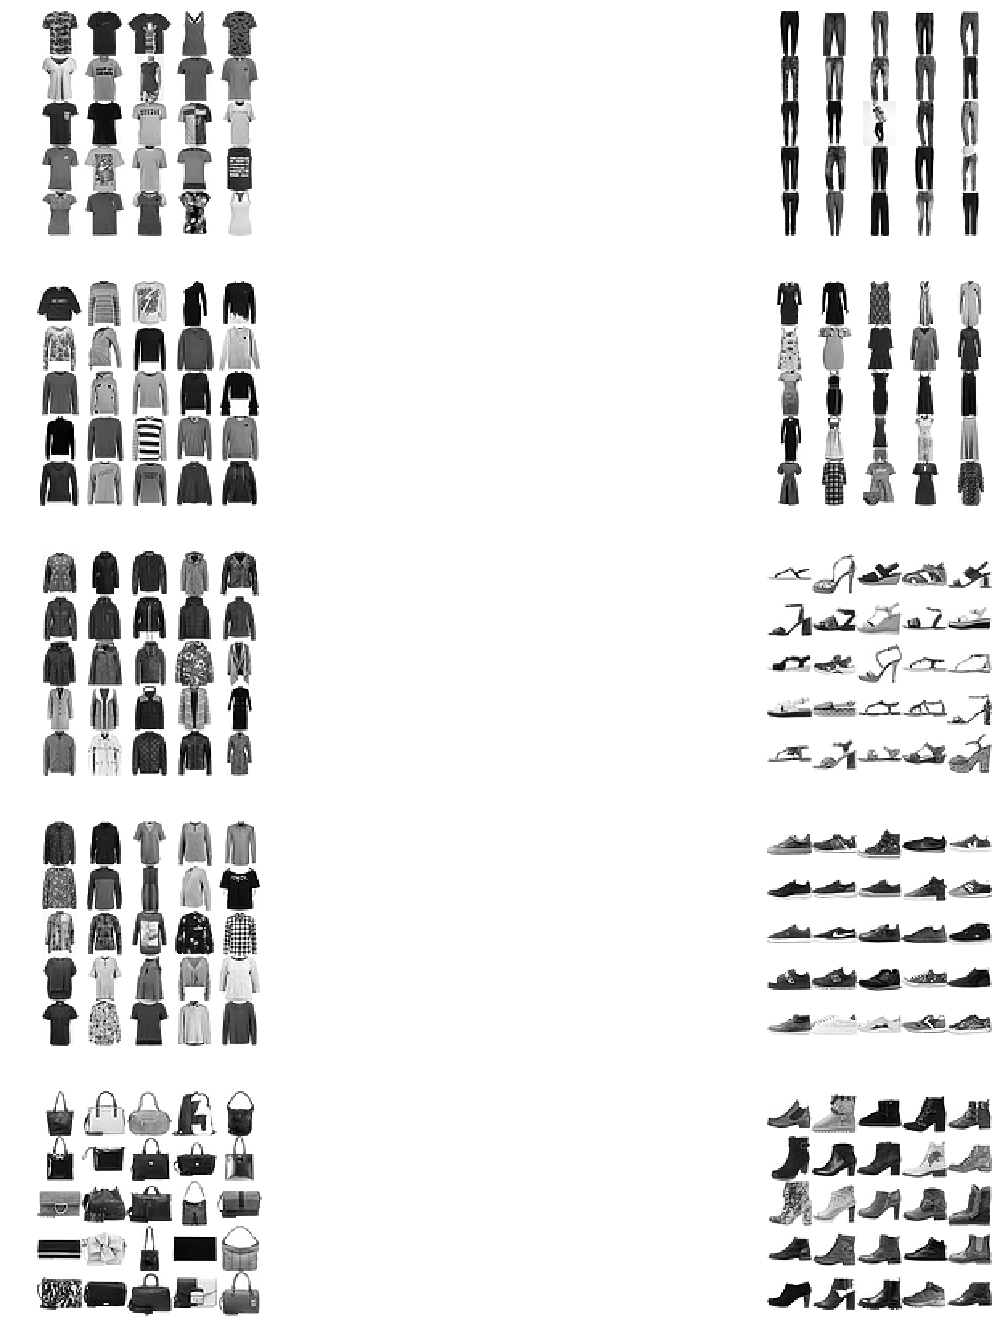

In [10]:
# plot images for each label
X_0 = X_train[(y_train == 0)]
X_1 = X_train[(y_train == 1)]
X_2 = X_train[(y_train == 2)]
X_3 = X_train[(y_train == 3)]
X_4 = X_train[(y_train == 4)]
X_5 = X_train[(y_train == 5)]
X_6 = X_train[(y_train == 6)]
X_7 = X_train[(y_train == 7)]
X_8 = X_train[(y_train == 8)]
X_9 = X_train[(y_train == 9)]

plt.figure(figsize=(24,24))
plt.subplot(521); plot_images(X_0[:25], images_per_row=5)
plt.subplot(522); plot_images(X_1[:25], images_per_row=5)
plt.subplot(523); plot_images(X_2[:25], images_per_row=5)
plt.subplot(524); plot_images(X_3[:25], images_per_row=5)
plt.subplot(525); plot_images(X_4[:25], images_per_row=5)
plt.subplot(526); plot_images(X_5[:25], images_per_row=5)
plt.subplot(527); plot_images(X_6[:25], images_per_row=5)
plt.subplot(528); plot_images(X_7[:25], images_per_row=5)
plt.subplot(529); plot_images(X_8[:25], images_per_row=5)
plt.subplot(5,2,10); plot_images(X_9[:25], images_per_row=5)
# save_fig("images_for_each_label")
plt.show()

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [12]:
## For Fun ...simple classifiers
from sklearn.base import BaseEstimator

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

class Guess5Clf(BaseEstimator):
   def fit(self,X,y=None):
       pass
   def predict(self,X):
       return np.zeros((len(X), 1), dtype=bool)
#       return ( np.random.randint(0, 2, len(X)) ).astype(bool)

guess = Guess5Clf()
predictions = guess.predict(y_train_5)
print("mean ",predictions.mean())

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train_5.astype(int), predictions.astype(int))
print("mse ",mse)

cross_val_score(guess, X_train, y_train_5, cv=3, scoring="accuracy")

mean  0.0
mse  0.1


array([0.9011, 0.8979, 0.901 ])

In [13]:
## The random predictor ('guess') from the For Fun cell above is chekced for its confusion matrix

y_train_guess = cross_val_predict(guess, X_train, y_train_5, cv=3)
print("guess",confusion_matrix(y_train_5, y_train_guess))
print("perfect ",confusion_matrix(y_train_5, y_train_5))

guess [[54000     0]
 [ 6000     0]]
perfect  [[54000     0]
 [    0  6000]]


In [14]:
## SGD Classifier
sgd_clf = SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print("precision", precision_score(y_train_5, y_train_pred))
print("recall", recall_score(y_train_5, y_train_pred))

precision 0.953118870145155
recall 0.8098333333333333


In [15]:
## Set threshold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")
len(y_scores)

y_train_pred_90 = (y_scores > 70000)
print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))

0.9744978560144437 0.7196666666666667


In [16]:
## Multiclass classification
sgd_clf.fit(X_train, y_train)
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8331 , 0.83045, 0.82935])

In [19]:
## precision and recall for each label

precision_score_list = []
recall_score_list = []

def scores_for_each_label(i):
    y_train_i = (y_train == i)
    y_test_i = (y_test == i)
    
    y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_i, cv=3)
    precision_score_i = round((precision_score(y_train_i, y_train_pred)),3)
    recall_score_i = round((recall_score(y_train_i, y_train_pred)),3)
#     print("precision",precision_score_i)
#     print("recall",recall_score_i )
    precision_score_list.append(precision_score_i)
    recall_score_list.append(recall_score_i)

for i in range(10):
#     print("This is scores for label ", i)
    scores_for_each_label(i)

print(precision_score_list,"\n",recall_score_list)

[0.803, 0.967, 0.647, 0.793, 0.731, 0.932, 0.484, 0.927, 0.94, 0.944] 
 [0.714, 0.942, 0.633, 0.824, 0.57, 0.87, 0.504, 0.846, 0.882, 0.872]


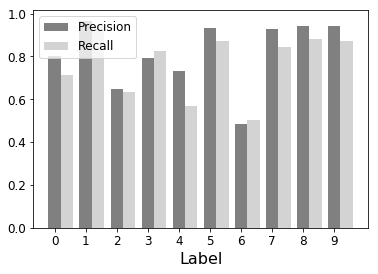

In [20]:
labels = range(10)
x = list(range(10))
total_width, n = 0.8, 2
width = total_width / n


plt.bar(x, precision_score_list, tick_label = labels, width=width, color='grey', label="Precision")
for i in x:
   x[i] = x[i] + width
plt.bar(x, recall_score_list, width=width, color='lightgrey', label="Recall")
plt.xlabel("Label", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
# save_fig("precision_recall_chart")
plt.show()

### training model with less data, does the accuracy decrease or not?

In [21]:
y_train_less = y_train[10000:16000]
X_train_scaled_less = scaler.fit_transform(X_train[10000:16000].astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled_less, y_train_less, cv=3, scoring="accuracy")

array([0.7982018, 0.77     , 0.8028028])

In [22]:
y_train_less = y_train[20000:20600]
X_train_scaled_less = scaler.fit_transform(X_train[20000:20600].astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled_less, y_train_less, cv=3, scoring="accuracy")

array([0.69117647, 0.72      , 0.74489796])

### confusion matrix

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_train = confusion_matrix(y_train, y_train_pred)
conf_mx_train

array([[4578,   20,  115,  546,   16,    3,  615,    0,  107,    0],
       [   8, 5687,   53,  205,   15,    0,   27,    0,    5,    0],
       [  41,    8, 4558,  144,  640,    1,  510,    1,   96,    1],
       [ 137,   75,   68, 5351,  144,    0,  204,    0,   19,    2],
       [   3,    5,  901,  449, 3932,    0,  668,    1,   41,    0],
       [   4,    3,    3,    6,    0, 5478,    3,  331,   64,  108],
       [ 651,   18,  805,  447,  446,    0, 3409,    1,  222,    1],
       [   0,    0,    0,    0,    0,  173,    0, 5647,   17,  163],
       [  20,    4,   31,  119,   25,    9,   82,   35, 5669,    6],
       [   0,    4,    0,    2,    0,  137,    0,  302,    6, 5549]])

In [24]:
y_test_pred = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3)
conf_mx_test = confusion_matrix(y_test, y_test_pred)
conf_mx_test

array([[776,  14,  40,  68,   1,   2,  72,   1,  24,   2],
       [  0, 958,   9,  22,   1,   1,   9,   0,   0,   0],
       [ 20,   8, 796,  15,  61,   1,  87,   0,  11,   1],
       [ 27,  28,  26, 875,  20,   0,  21,   0,   3,   0],
       [  1,   0, 309,  41, 487,   1, 156,   0,   5,   0],
       [  2,   0,   0,   3,   0, 874,   0,  57,  15,  49],
       [161,  13, 151,  49,  56,   4, 532,   0,  34,   0],
       [  0,   0,   0,   0,   0,  49,   0, 833,   3, 115],
       [  2,   2,   9,  17,   3,   4,  12,   6, 943,   2],
       [  0,   0,   0,   0,   0,  29,   0,  33,   1, 937]])

In [25]:
row_sums_train = conf_mx_train.sum(axis=1, keepdims=True)
row_sums_test = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx_train = 100*(conf_mx_train / row_sums_train)
norm_conf_mx_test = 100*(conf_mx_test / row_sums_test)
float_formatter = lambda x: "%.0f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
print("train","\n", norm_conf_mx_train)
print("test","\n", norm_conf_mx_test)

train 
 [[76 0 2 9 0 0 10 0 2 0]
 [0 95 1 3 0 0 0 0 0 0]
 [1 0 76 2 11 0 8 0 2 0]
 [2 1 1 89 2 0 3 0 0 0]
 [0 0 15 7 66 0 11 0 1 0]
 [0 0 0 0 0 91 0 6 1 2]
 [11 0 13 7 7 0 57 0 4 0]
 [0 0 0 0 0 3 0 94 0 3]
 [0 0 1 2 0 0 1 1 94 0]
 [0 0 0 0 0 2 0 5 0 92]]
test 
 [[78 1 4 7 0 0 7 0 2 0]
 [0 96 1 2 0 0 1 0 0 0]
 [2 1 80 2 6 0 9 0 1 0]
 [3 3 3 88 2 0 2 0 0 0]
 [0 0 31 4 49 0 16 0 0 0]
 [0 0 0 0 0 87 0 6 2 5]
 [16 1 15 5 6 0 53 0 3 0]
 [0 0 0 0 0 5 0 83 0 12]
 [0 0 1 2 0 0 1 1 94 0]
 [0 0 0 0 0 3 0 3 0 94]]


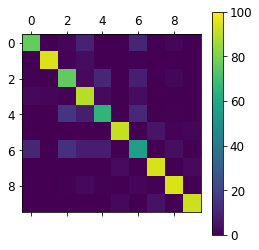

In [26]:
# train
plt.matshow(norm_conf_mx_train,vmin=0, vmax=100)
plt.colorbar()
# save_fig("norm_conf_mx_train")
plt.show()

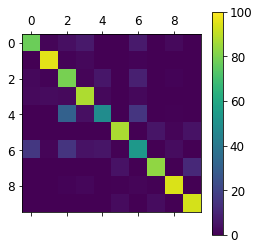

In [27]:
# test
plt.matshow(norm_conf_mx_test,vmin=0, vmax=100)
plt.colorbar()
# save_fig("norm_conf_mx_test")
plt.show()

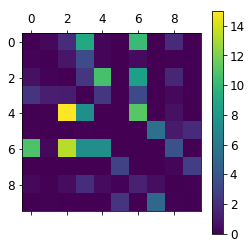

In [28]:
# show errors for training set
norm_conf_mx_train_= norm_conf_mx_train
np.fill_diagonal(norm_conf_mx_train_,0)
plt.matshow(norm_conf_mx_train_)
plt.colorbar()
# save_fig("norm_conf_mx_train_errors")
plt.show()

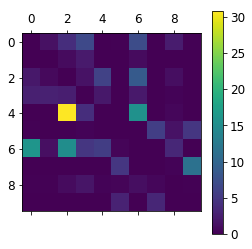

In [29]:
# test
norm_conf_mx_test_= norm_conf_mx_test
np.fill_diagonal(norm_conf_mx_test_,0)
plt.matshow(norm_conf_mx_test_)
plt.colorbar()
# save_fig("norm_conf_mx_test_errors")
plt.show()

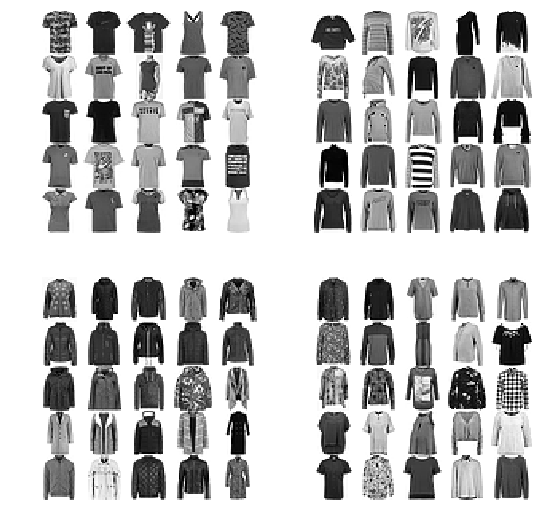

In [30]:
# more errors happend to label 0,2,4,6 
X_0 = X_train[(y_train == 0)]
X_2 = X_train[(y_train == 2)]
X_4 = X_train[(y_train == 4)]
X_6 = X_train[(y_train == 6)]

plt.figure(figsize=(9,9))
plt.subplot(221); plot_images(X_0[:25], images_per_row=5)
plt.subplot(222); plot_images(X_2[:25], images_per_row=5)
plt.subplot(223); plot_images(X_4[:25], images_per_row=5)
plt.subplot(224); plot_images(X_6[:25], images_per_row=5)
# save_fig("images_for_labels_0&2&4&6")

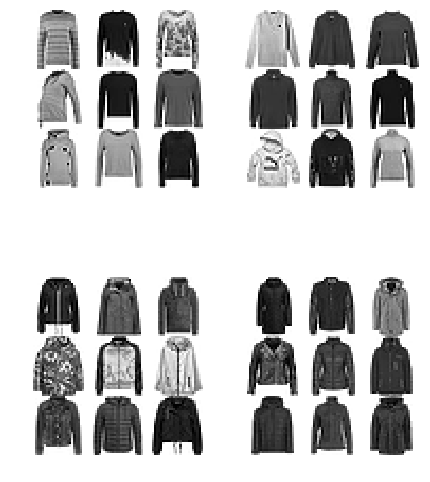

In [31]:
# error analysis : label 2 and 4
cl_a, cl_b = 2, 4
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(7,9))
plt.subplot(221); plot_images(X_aa[:9], images_per_row=3)
plt.subplot(222); plot_images(X_ab[:9], images_per_row=3)
plt.subplot(223); plot_images(X_ba[:9], images_per_row=3)
plt.subplot(224); plot_images(X_bb[:9], images_per_row=3)
# save_fig("error_analysis_images_plot_2&4")
plt.show()

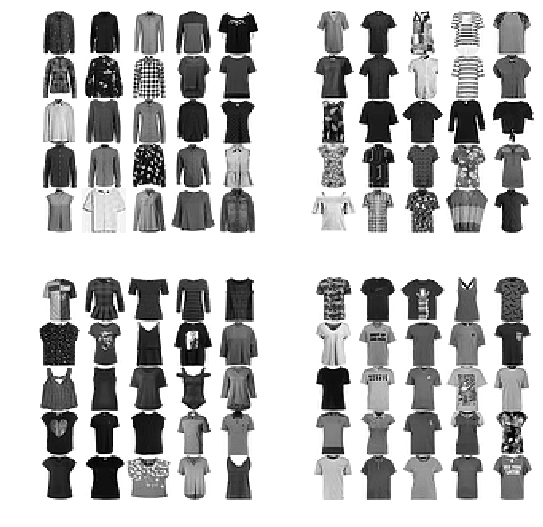

In [32]:
# error analysis : label 6 and 0
cl_a, cl_b = 6, 0
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(9,9))
plt.subplot(221); plot_images(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_images(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_images(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_images(X_bb[:25], images_per_row=5)
# save_fig("error_analysis_images_plot_6&0")
plt.show()

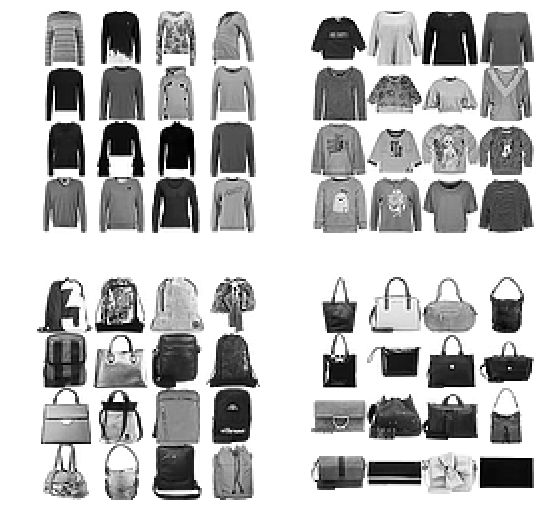

In [33]:
# error analysis
cl_a, cl_b = 2, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(9,9))
plt.subplot(221); plot_images(X_aa[:16], images_per_row=4)
plt.subplot(222); plot_images(X_ab[:16], images_per_row=4)
plt.subplot(223); plot_images(X_ba[:16], images_per_row=4)
plt.subplot(224); plot_images(X_bb[:16], images_per_row=4)
# save_fig("error_analysis_images_plot_2&8")
plt.show()

In [34]:
# Multilabel classification Knn
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
#takes a long time
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
#f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [36]:
# Multi output
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_and_clean_image_example


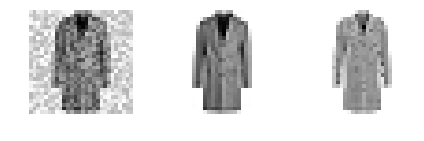

In [37]:
def plot_image(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_image = knn_clf.predict([X_test_mod[some_index]])

plt.subplot(131); plot_image(X_test_mod[some_index])
plt.subplot(132); plot_image(y_test_mod[some_index])
plt.subplot(133); plot_image(clean_image)
save_fig("noisy_and_clean_image_example")
plt.show();